In [1]:
import time
import datetime
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
filepath="/content/Wangboman.csv"
df = pd.read_csv(filepath)
df.columns = ['Time','Answerer','VR world','Topic','Collaborators(Main&aux)','StartTime','EndTime','Valence','Arousal','Dominance','Excite-Not Excite','Serious-Not Serious','Smooth-Not Smooth','Bright-Not Bright','Eminent-Not Eminent','Close-Not Close','Equal-Not Equal']
print(df)
print(type(df))

                          Time   Answerer       VR world     Topic  \
0  2022/07/19 1:47:16 午後 GMT+9  wangboman     relax room     relax   
1  2022/07/19 2:02:36 午後 GMT+9  wangboman     relax room   vr game   
2  2022/07/19 2:08:48 午後 GMT+9  wangboman         forest     relax   
3  2022/07/19 2:14:37 午後 GMT+9  wangboman         forest        vr   
4  2022/07/19 2:22:04 午後 GMT+9  wangboman   blood memory      stay   
5  2022/07/19 2:28:02 午後 GMT+9  wangboman   blood memory  life for   
6  2022/07/19 2:35:01 午後 GMT+9  wangboman   ghost memory      stay   
7  2022/07/19 2:45:10 午後 GMT+9  wangboman  ghost stories      play   

  Collaborators(Main&aux) StartTime   EndTime  Valence  Arousal  Dominance  \
0               wangboman  13:41:11  13:44:11        8        5          3   
1          wangboman,wang  13:57:00  14:00:00        8        6          5   
2               wangboman  14:04:30  14:07:00        8        2          7   
3           wangboman,liu  14:10:00  14:12:20        8   

In [5]:
df.iloc[0]

Time                       2022/07/19 1:47:16 午後 GMT+9
Answerer                                     wangboman
VR world                                    relax room
Topic                                            relax
Collaborators(Main&aux)                      wangboman
StartTime                                     13:41:11
EndTime                                       13:44:11
Valence                                              8
Arousal                                              5
Dominance                                            3
Excite-Not Excite                                    3
Serious-Not Serious                                  3
Smooth-Not Smooth                                    3
Bright-Not Bright                                    3
Eminent-Not Eminent                                  3
Close-Not Close                                      3
Equal-Not Equal                                      3
Name: 0, dtype: object

In [6]:
filepath="/content/rv0.csv"
rv_df = pd.read_csv(filepath)

rv_df_mean = rv_df.mean().to_frame()
#type(rv_df_mean)
rv_df_mean = rv_df_mean.T
#print(rv_df_mean.T)
#rv_df_mean['HRV_MeanNN']
rv_df_mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_TINN,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,687.018471,37.063845,NaN,NaN,NaN,NaN,NaN,NaN,19.342646,19.396497,...,129.730903,NaN,NaN,0.031856,0.007093,0.00065,4.215329,0.787145,0.195403,-5.169016


In [7]:
rv_df_mean['HRV_MeanNN']

0    687.018471
Name: HRV_MeanNN, dtype: float64

In [8]:
def savecsv(filepath,data):
    data.to_csv(filepath,index=0)
    print("saved to ",filepath)
    print("-"*50)  

In [10]:
frames = []
for i in range(8):
  #print(i)
  filepath="/content/rv"+str(i)+".csv"
  rv_df = pd.read_csv(filepath)
  rv_df_mean = rv_df.mean().to_frame().T
  frames.append(rv_df_mean)
  
  #print(result.iloc[1])

result = pd.concat(frames,axis=0)

result = result.reset_index()

drop_column=['index','HRV_SDANN1','HRV_SDNNI1','HRV_SDANN2','HRV_SDNNI2','HRV_SDANN5','HRV_SDNNI5','HRV_ULF','HRV_VLF']
result = result.drop(drop_column, axis=1)
#print(result)

result = pd.concat([result,df[['Valence','Arousal','Dominance','Excite-Not Excite','Serious-Not Serious','Smooth-Not Smooth','Bright-Not Bright','Eminent-Not Eminent','Close-Not Close','Equal-Not Equal']]],axis=1)
print(result)
#

save_filePath="/content/"+ "res.csv"
savecsv(save_filePath,result)

   HRV_MeanNN   HRV_SDNN  HRV_RMSSD   HRV_SDSD  HRV_CVNN  HRV_CVSD  \
0  687.018471  37.063845  19.342646  19.396497  0.053917  0.028138   
1  701.007227  33.785338  20.196449  20.253716  0.048220  0.028818   
2  703.515222  41.073902  23.139781  23.206180  0.058342  0.032883   
3  708.919908  39.417615  20.546441  20.605011  0.055611  0.028987   
4  725.178102  41.371099  21.010738  21.071699  0.057076  0.028979   
5  718.291414  38.983367  21.408602  21.470322  0.054323  0.029803   
6  724.885235  43.602290  23.278710  23.346219  0.060179  0.032068   
7  752.267025  47.948444  29.906725  29.998657  0.063870  0.039672   

   HRV_MedianNN  HRV_MadNN  HRV_MCVNN  HRV_IQRNN  ...  Valence  Arousal  \
0    690.235043  40.518064   0.058622  54.914530  ...        8        5   
1    699.615385  35.195910   0.050325  47.767094  ...        8        6   
2    702.205128  39.764092   0.056592  52.833333  ...        8        2   
3    712.582418  38.449846   0.054008  54.766484  ...        8       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [11]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN',
       'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN',
       'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_MinNN',
       'HRV_MaxNN', 'HRV_HTI', 'HRV_TINN', 'HRV_LF', 'HRV_HF', 'HRV_VHF',
       'HRV_LFHF', 'HRV_LFn', 'HRV_HFn', 'HRV_LnHF', 'Valence','Arousal','Dominance']
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()


In [12]:
print(result.columns)

Index(['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN',
       'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN',
       'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_MinNN',
       'HRV_MaxNN', 'HRV_HTI', 'HRV_TINN', 'HRV_LF', 'HRV_HF', 'HRV_VHF',
       'HRV_LFHF', 'HRV_LFn', 'HRV_HFn', 'HRV_LnHF', 'Valence', 'Arousal',
       'Dominance', 'Excite-Not Excite', 'Serious-Not Serious',
       'Smooth-Not Smooth', 'Bright-Not Bright', 'Eminent-Not Eminent',
       'Close-Not Close', 'Equal-Not Equal'],
      dtype='object')


In [13]:
result.corr()

,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,...,Valence,Arousal,Dominance,Excite-Not Excite,Serious-Not Serious,Smooth-Not Smooth,Bright-Not Bright,Eminent-Not Eminent,Close-Not Close,Equal-Not Equal
HRV_MeanNN,1.000000,0.851950,0.841732,0.841811,0.745226,0.774169,0.993802,0.744768,0.539990,0.814038,...,-0.791446,0.416902,-0.641337,0.582381,-0.578259,0.316837,0.501122,0.501122,0.316837,-0.269004
HRV_SDNN,0.851950,1.000000,0.871028,0.871033,0.983873,0.842960,0.862076,0.881385,0.770264,0.911465,...,-0.649568,0.405477,-0.505621,0.825445,-0.610355,0.552374,0.615542,0.615542,0.552374,0.093567
HRV_RMSSD,0.841732,0.871028,1.000000,1.000000,0.815905,0.993085,0.818168,0.643326,0.479354,0.815163,...,-0.482176,0.465292,-0.337234,0.659365,-0.597762,0.366050,0.533333,0.533333,0.366050,-0.211346
HRV_SDSD,0.841811,0.871033,1.000000,1.000000,0.815886,0.993066,0.818254,0.643364,0.479368,0.815208,...,-0.482249,0.465301,-0.337342,0.659361,-0.597781,0.366019,0.533333,0.533333,0.366019,-0.211426
HRV_CVNN,0.745226,0.983873,0.815905,0.815886,1.000000,0.802222,0.760408,0.870923,0.799537,0.880586,...,-0.565105,0.363870,-0.426792,0.853523,-0.581864,0.598998,0.615581,0.615581,0.598998,0.214616
HRV_CVSD,0.774169,0.842960,0.993085,0.993066,0.802222,1.000000,0.746792,0.594698,0.446183,0.775652,...,-0.398852,0.445137,-0.248705,0.649005,-0.577202,0.366035,0.519986,0.519986,0.366035,-0.182295
HRV_MedianNN,0.993802,0.862076,0.818168,0.818254,0.760408,0.746792,1.000000,0.761238,0.559777,0.836714,...,-0.774803,0.447330,-0.653936,0.584463,-0.538911,0.290100,0.464965,0.464965,0.290100,-0.259667
HRV_MadNN,0.744768,0.881385,0.643326,0.643364,0.870923,0.594698,0.761238,1.000000,0.963353,0.881459,...,-0.791737,0.254760,-0.771864,0.897208,-0.705997,0.767497,0.763084,0.763084,0.767497,0.330913
HRV_MCVNN,0.539990,0.770264,0.479354,0.479368,0.799537,0.446183,0.559777,0.963353,1.000000,0.781722,...,-0.689387,0.134339,-0.713887,0.906191,-0.678278,0.858657,0.781320,0.781320,0.858657,0.528007
HRV_IQRNN,0.814038,0.911465,0.815163,0.815208,0.880586,0.775652,0.836714,0.881459,0.781722,1.000000,...,-0.642745,0.455154,-0.665642,0.857988,-0.707561,0.540590,0.673935,0.673935,0.540590,-0.064313


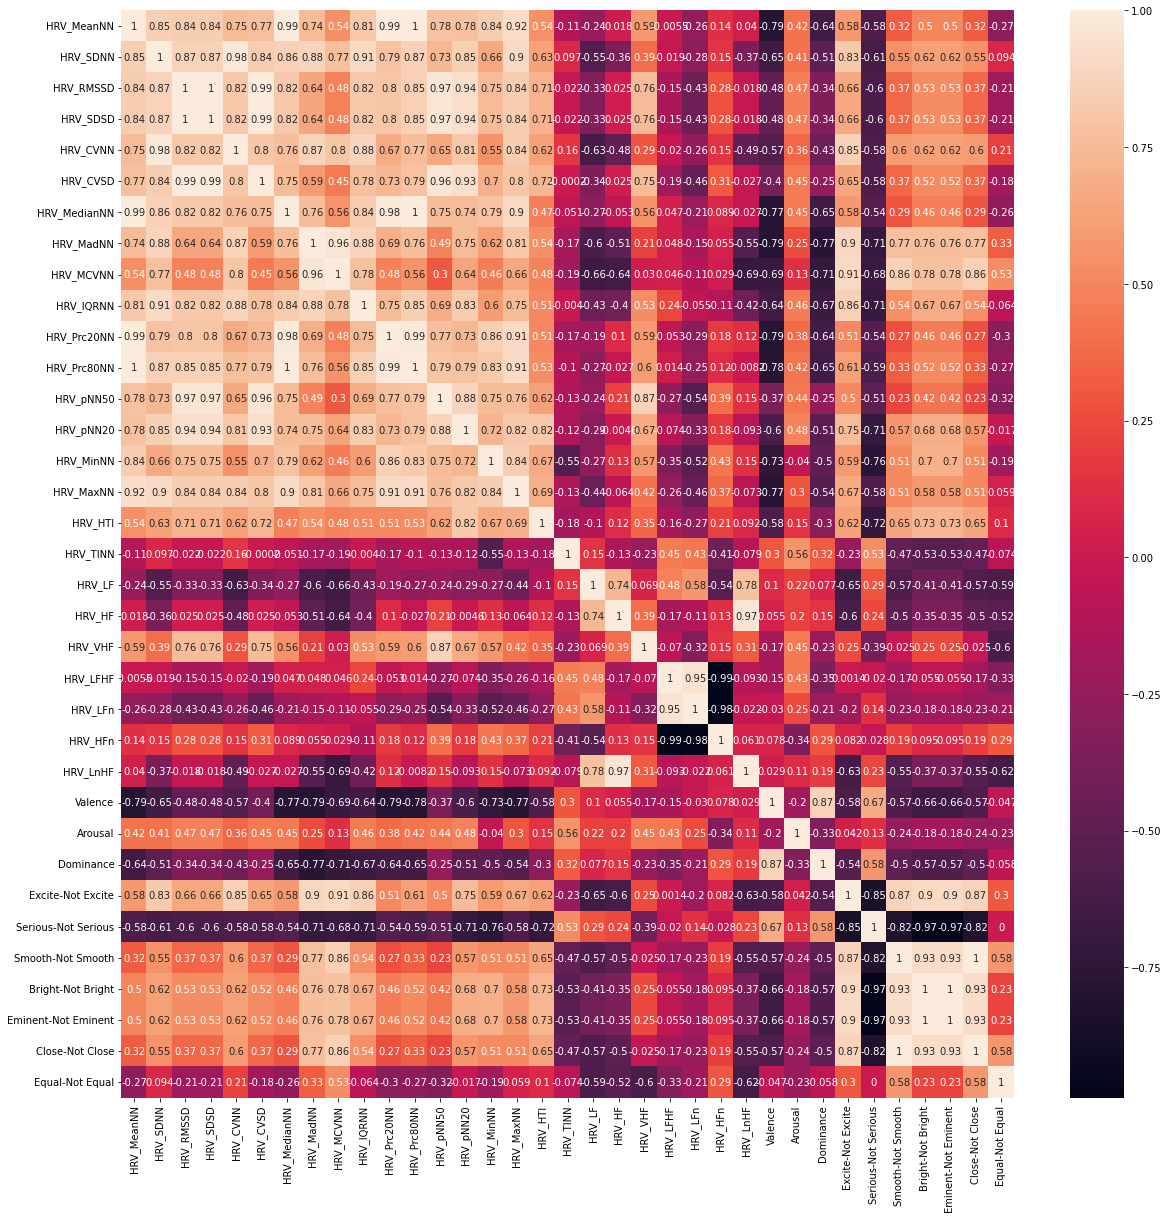

In [15]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(result.corr(),annot=True)
